In [261]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as skpre
import os
import json
import pickle
import pandas as pd
from IPython.display import display
import seaborn as sns
from __future__ import division

In [262]:
f = open('../electron-app/data/tmp.txt')
pkl = []
with open('../processed.pkl', 'r+') as p:
    pkl = pickle.load(p)

print type(pkl)

arr = f.read().replace(']', '').split('[')
arr = filter(lambda x: not x == '[' or len(x) > 0, arr)
arr = arr[1:]
res = []
for v in arr:
    v = '['+v +']'
    try:
        res.append(np.array(json.loads(v)).ravel())
        
    except ValueError:
        continue
        
res = np.array(res)
res = res.flatten()
fin = []
for r in res:
    for k in r:
        fin.append(k)
        
# fin = np.array(fin)
# print fin.shape
print fin[-1]

<type 'list'>
{u'kftime': 700, u'ftime': 576, u'key': u'.', u'time': 124}


,ftime,kftime,time
count,1439.000000,1462.000000,1462.000000
mean,220.481584,308.564295,91.551300
std,4445.494738,4411.076708,29.311955
min,0.000000,47.000000,22.000000
25%,14.000000,104.000000,78.000000
50%,50.000000,140.000000,90.000000
75%,93.000000,185.000000,101.000000
max,167753.000000,167852.000000,607.000000


,ftime,key,kftime,time
0,12773.0,Meta,13061,288
1,NaN,H,87,87
2,79.0,e,206,127
3,2.0,l,208,206
4,475.0,l,582,107


,ftime,key,kftime,time
1457,55.0,a,134,79
1458,64.0,g,132,68
1459,57.0,a,192,135
1460,0.0,i,93,93
1461,576.0,.,700,124


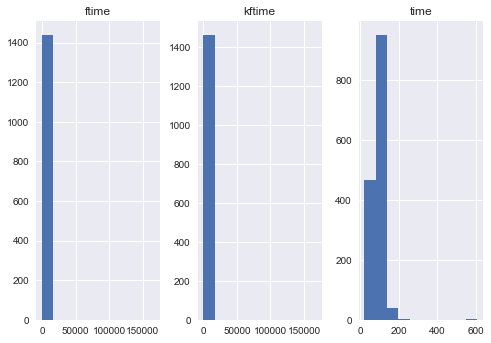

ftime
Mean:	220.481584434
Median:	50.0
key
Mean:	kftime
Mean:	308.564295486
Median:	140.0
time
Mean:	91.5512995896
Median:	90.0

Classes
[u'Meta' u'H' u'e' u'l' u'o' u' ' u'i' u't' u"'" u's' u'n' u'c' u'm' u'y'
 u'u' u'g' u'd' u'f' u'r' u'I' u'a' u'v' u'w' u'>' u'?' u'M' u'k' u'h' u'q'
 u'A' u'j' u'F' u'!' u'Alt' u'p' u'b' u'W' u'T' u'S' u'E' u'.' u'B' u','
 u'N' u'D' u'Y' u'z']


In [263]:
df = pd.DataFrame(fin)
df.fillna(0)
df.head(30)

ftime = np.array(df['ftime'])
kftime = np.array(df['kftime'])
time = np.array(df['time'])
ftime[np.isnan(ftime)] = 0
ftime = (ftime - ftime.mean()) / (ftime.max() - ftime.min())

data = np.array(np.r_[ftime, kftime, time]).reshape(3, -1)

display(df.describe())
display(df.head(5))
display(df.tail(5))
df.hist(layout=(1, 3))
plt.show()

classes = df['key'].unique()
y = df['key']

for i in df.columns:
    try:
        print i
        print 'Mean:\t', df[i].mean()
        print 'Median:\t', df[i].median()
    except:
        pass
    
print '\nClasses\n', classes

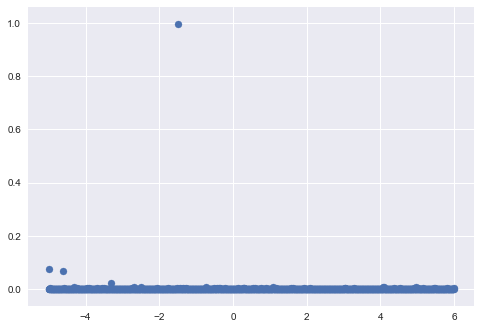

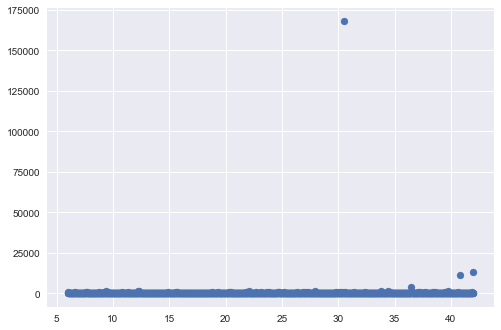

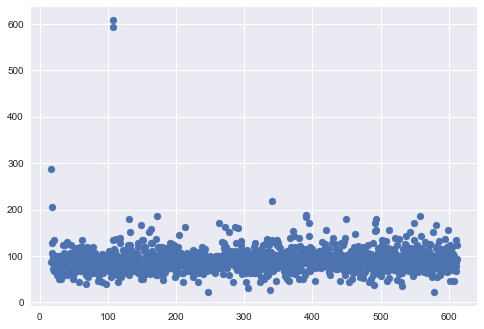

(1462,) (3, 1462)
[u'Meta' u'H' u'e' u'l' u'o' u' ' u'i' u't' u"'" u's' u'n' u'c' u'm' u'y'
 u'u' u'g' u'd' u'f' u'r' u'I' u'a' u'v' u'w' u'>' u'?' u'M' u'k' u'h' u'q'
 u'A' u'j' u'F' u'!' u'Alt' u'p' u'b' u'W' u'T' u'S' u'E' u'.' u'B' u','
 u'N' u'D' u'Y' u'z']


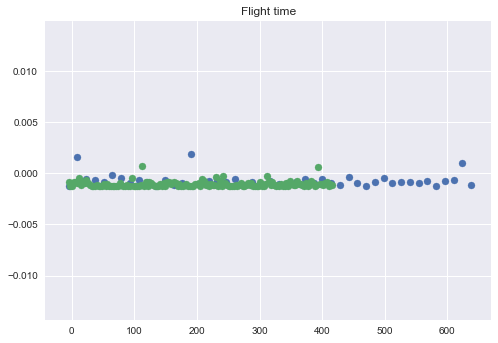

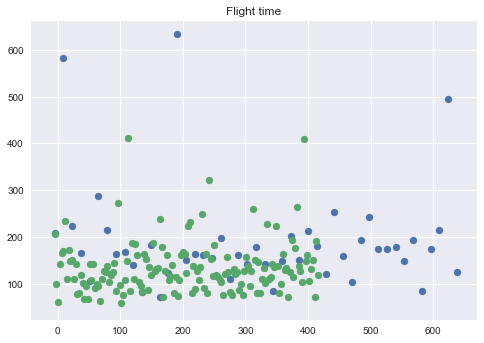

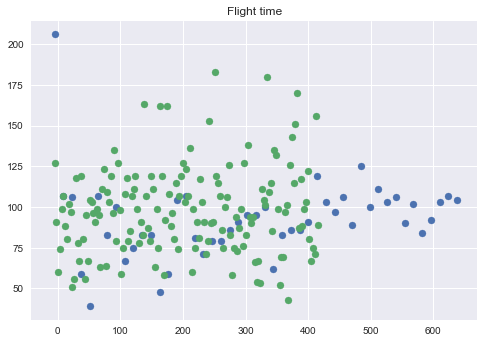

In [267]:
plt.scatter(np.linspace(ftime.min() - 5, ftime.max()+5, ftime.shape[0]), ftime)
plt.show()

plt.scatter(np.linspace(kftime.min() - 5, ftime.max()+5, kftime.shape[0]), kftime)
plt.show()

plt.scatter(np.linspace(time.min() - 5, time.max()+5, ftime.shape[0]), time)
plt.show()

print y.shape, data.shape
print classes
dd_H = data[:, y == 'e']
dd_f = data[:, y == 'l']

for i in range(3):
    plt.scatter(np.linspace(dd_f.min() - 5, dd_f.max()+5, dd_f.shape[1]), dd_f[i].ravel())
    plt.scatter(np.linspace(dd_H.min() - 5, dd_H.max()+5, dd_H.shape[1]), dd_H[i].ravel())
    plt.title('Flight time')
    plt.show()
    